# Exploring weather trends

In this project I want to explore the global weather trend. I'd like to compare the global weather trend with the weather trend in London to explore any similarities and differences. I'd also like to predict the average weather trend in future years using the SARIMAX model <br>

**knowledge sources:** <br>
`1.` https://www.udacity.com/course/data-analyst-nanodegree--nd002 <br>
`2.`https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b'

## Import and read csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import itertools

**SQL query used to extract data from db:** 

`SELECT` global_data.avg_temp `AS` global_avg_temp, city_data.*, city_list.* <br>

`FROM` global_data <br>

`JOIN` city_data <br>

`ON` global_data.year=city_data.year <br>

`JOIN` city_list <br>

`ON` city_data.city=city_list.city



In [2]:
df = pd.read_csv('results (1).csv')

## explore dataset

In [3]:
df.head()

,global_avg_temp,year,city,country,avg_temp,city.1,country.1
0,7.98,1849,Abidjan,Côte D'Ivoire,25.58,Abidjan,Côte D'Ivoire
1,7.90,1850,Abidjan,Côte D'Ivoire,25.52,Abidjan,Côte D'Ivoire
2,8.18,1851,Abidjan,Côte D'Ivoire,25.67,Abidjan,Côte D'Ivoire
3,8.10,1852,Abidjan,Côte D'Ivoire,NaN,Abidjan,Côte D'Ivoire
4,8.04,1853,Abidjan,Côte D'Ivoire,NaN,Abidjan,Côte D'Ivoire


In [4]:
df.drop(columns=['city.1','country.1'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76009 entries, 0 to 76008
Data columns (total 5 columns):
global_avg_temp    76009 non-null float64
year               76009 non-null int64
city               76009 non-null object
country            76009 non-null object
avg_temp           73680 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.9+ MB


In [6]:
df.describe()

,global_avg_temp,year,avg_temp
count,76009.000000,76009.000000,73680.000000
mean,8.445060,1906.859977,16.301814
std,0.528484,65.970048,7.601265
min,5.780000,1750.000000,-14.350000
25%,8.120000,1859.000000,9.750000
50%,8.430000,1911.000000,16.220000
75%,8.730000,1962.000000,24.180000
max,9.730000,2013.000000,30.730000


In [7]:
df.isna().sum()

global_avg_temp       0
year                  0
city                  0
country               0
avg_temp           2329
dtype: int64

## fill na values

In [8]:
df = df.interpolate()

## split df by my city and global

In [9]:
ldn_df = df[(df.city == 'London') & (df.country == 'United Kingdom')]

In [10]:
ldn_df = ldn_df.groupby('year')['avg_temp'].mean()

In [11]:
global_df = df.groupby('year')['global_avg_temp'].mean()

In [12]:
ldn_df.head()

year
1750    9.295
1751    9.415
1752    4.090
1753    8.645
1754    8.675
Name: avg_temp, dtype: float64

In [13]:
global_df.head()

year
1750    8.72
1751    7.98
1752    5.78
1753    8.39
1754    8.47
Name: global_avg_temp, dtype: float64

In [14]:
global_df = global_df.to_frame()

In [15]:
global_df = global_df.reset_index()

In [16]:
ldn_df = ldn_df.to_frame()

In [17]:
ldn_df = ldn_df.reset_index()

In [18]:
rolling_mean_ldn = ldn_df.avg_temp.rolling(window=20).mean()
rolling_mean_global = global_df.global_avg_temp.rolling(window=20).mean()

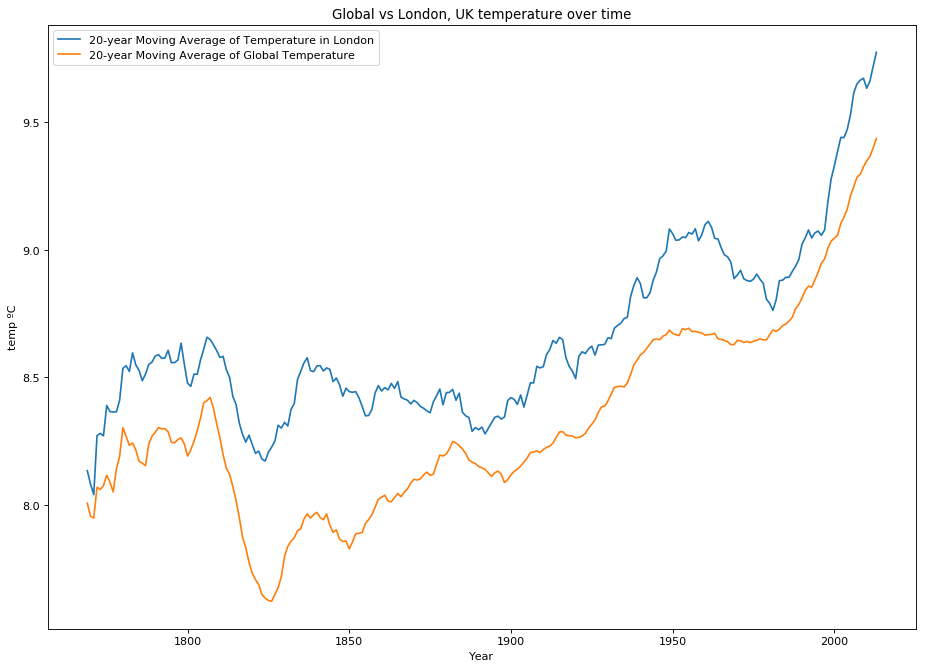

In [19]:
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ldn_df.year, rolling_mean_ldn, label='20-year Moving Average of Temperature in London')
plt.plot(global_df.year, rolling_mean_global, label='20-year Moving Average of Global Temperature')
plt.legend(loc='upper left')
plt.title('Global vs London, UK temperature over time')
plt.xlabel('Year')
plt.ylabel('temp ºC')
plt.show();

Q1: Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

A1: London is warmer on average compared to the global average. This has consistantly been the case over time.


Q2: How do the changes in your city’s temperatures over time compare to the changes in the global average?

A2: The temperature in London looks like it's increasing throughout the years in line with global average temperatures.

Q3: What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

A3: The overall trend is that global temperatures are increasing. This trend has been consistent over the last few hundred years.

Q4: Why did the average global temperature drop between 1800 and 1850?

A4: After some research, the 1800-1850s was in fact a particularly cold interval as noted by NASA. It's suggested that the decrease in the human population dur to the Black Death and colonisation of the Americas was a driver for the reduction in global temperatures. (reference: https://en.wikipedia.org/wiki/Little_Ice_Age)

In [137]:
global_s = df.groupby('year')['global_avg_temp'].mean()

In [138]:
global_s.head(10)

year
1750    8.72
1751    7.98
1752    5.78
1753    8.39
1754    8.47
1755    8.36
1756    8.85
1757    9.02
1758    6.74
1759    7.99
Name: global_avg_temp, dtype: float64

In [139]:
idx = pd.date_range('1750-12-31','2013-12-31',freq='YS')

In [140]:
idx

DatetimeIndex(['1751-01-01', '1752-01-01', '1753-01-01', '1754-01-01',
               '1755-01-01', '1756-01-01', '1757-01-01', '1758-01-01',
               '1759-01-01', '1760-01-01',
               ...
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01'],
              dtype='datetime64[ns]', length=263, freq='AS-JAN')

In [141]:
global_s.index = pd.to_datetime(global_s.index, format='%Y')

In [142]:
global_s.head()

year
1750-01-01    8.72
1751-01-01    7.98
1752-01-01    5.78
1753-01-01    8.39
1754-01-01    8.47
Name: global_avg_temp, dtype: float64

In [143]:
global_s = global_s.reindex(idx,fill_value=2)

In [144]:
global_s.head()

1751-01-01    7.98
1752-01-01    5.78
1753-01-01    8.39
1754-01-01    8.47
1755-01-01    8.36
Freq: AS-JAN, Name: global_avg_temp, dtype: float64

In [145]:
global_s.index

DatetimeIndex(['1751-01-01', '1752-01-01', '1753-01-01', '1754-01-01',
               '1755-01-01', '1756-01-01', '1757-01-01', '1758-01-01',
               '1759-01-01', '1760-01-01',
               ...
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01'],
              dtype='datetime64[ns]', length=263, freq='AS-JAN')

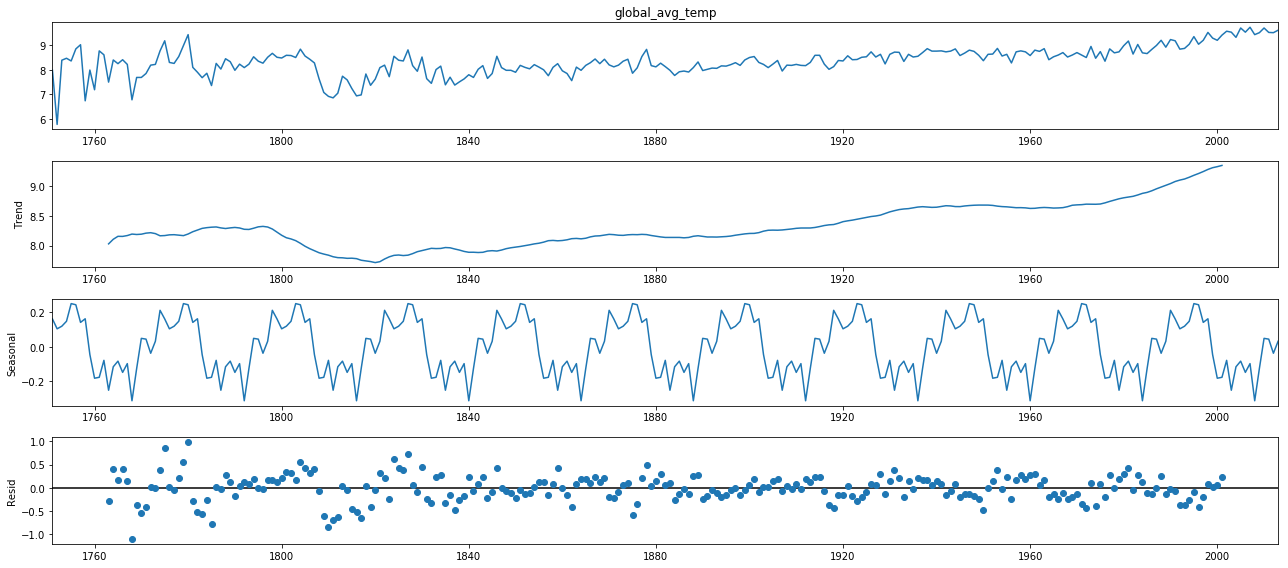

In [146]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(global_s, model='additive',period=24)
fig = decomposition.plot()
plt.show()

In [147]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 1, 0, 24)
SARIMAX: (0, 1, 0) x (0, 1, 1, 24)
SARIMAX: (0, 1, 0) x (1, 0, 0, 24)


In [179]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(global_s,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit(maxiter=200)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)12 - AIC:1859.4207859869152


/Users/shazadladha/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 24)12 - AIC:1693.1558274850008
ARIMA(0, 0, 0)x(0, 1, 0, 24)12 - AIC:363.00566700400793
ARIMA(0, 0, 0)x(0, 1, 1, 24)12 - AIC:277.6265387529603
ARIMA(0, 0, 0)x(1, 0, 0, 24)12 - AIC:356.8981188120748
ARIMA(0, 0, 0)x(1, 0, 1, 24)12 - AIC:328.95158197269126
ARIMA(0, 0, 0)x(1, 1, 0, 24)12 - AIC:278.38732713820826
ARIMA(0, 0, 0)x(1, 1, 1, 24)12 - AIC:279.4471317118758
ARIMA(0, 0, 1)x(0, 0, 0, 24)12 - AIC:1516.2730415386031
ARIMA(0, 0, 1)x(0, 0, 1, 24)12 - AIC:1379.518304137047
ARIMA(0, 0, 1)x(0, 1, 0, 24)12 - AIC:296.63925372643087
ARIMA(0, 0, 1)x(0, 1, 1, 24)12 - AIC:188.84046575108755
ARIMA(0, 0, 1)x(1, 0, 0, 24)12 - AIC:319.0848290025508


/Users/shazadladha/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 24)12 - AIC:290.60428006836685
ARIMA(0, 0, 1)x(1, 1, 0, 24)12 - AIC:199.0521315032524
ARIMA(0, 0, 1)x(1, 1, 1, 24)12 - AIC:190.86160010971287
ARIMA(0, 1, 0)x(0, 0, 0, 24)12 - AIC:276.6582451906019
ARIMA(0, 1, 0)x(0, 0, 1, 24)12 - AIC:94.24687864804032
ARIMA(0, 1, 0)x(0, 1, 0, 24)12 - AIC:356.75414159836146
ARIMA(0, 1, 0)x(0, 1, 1, 24)12 - AIC:172.74032633652746
ARIMA(0, 1, 0)x(1, 0, 0, 24)12 - AIC:101.42763512578675


/Users/shazadladha/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 24)12 - AIC:96.18401857364182
ARIMA(0, 1, 0)x(1, 1, 0, 24)12 - AIC:188.8737067950184
ARIMA(0, 1, 0)x(1, 1, 1, 24)12 - AIC:138.13739654493642
ARIMA(0, 1, 1)x(0, 0, 0, 24)12 - AIC:191.62267671226724
ARIMA(0, 1, 1)x(0, 0, 1, 24)12 - AIC:66.30197642668298
ARIMA(0, 1, 1)x(0, 1, 0, 24)12 - AIC:257.7195048198326
ARIMA(0, 1, 1)x(0, 1, 1, 24)12 - AIC:127.80977186390007
ARIMA(0, 1, 1)x(1, 0, 0, 24)12 - AIC:69.88523392993403
ARIMA(0, 1, 1)x(1, 0, 1, 24)12 - AIC:64.81666201886091
ARIMA(0, 1, 1)x(1, 1, 0, 24)12 - AIC:145.04291534577175
ARIMA(0, 1, 1)x(1, 1, 1, 24)12 - AIC:105.26121261227179
ARIMA(1, 0, 0)x(0, 0, 0, 24)12 - AIC:306.1575602396466
ARIMA(1, 0, 0)x(0, 0, 1, 24)12 - AIC:105.02554458120025
ARIMA(1, 0, 0)x(0, 1, 0, 24)12 - AIC:295.8925650015885
ARIMA(1, 0, 0)x(0, 1, 1, 24)12 - AIC:151.25331241522585
ARIMA(1, 0, 0)x(1, 0, 0, 24)12 - AIC:103.39026277785361
ARIMA(1, 0, 0)x(1, 0, 1, 24)12 - AIC:105.20626935455208
ARIMA(1, 0, 0)x(1, 1, 0, 24)12 - AIC:153.38466360430994


/Users/shazadladha/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 24)12 - AIC:63.32460404268344
ARIMA(1, 1, 1)x(0, 1, 0, 24)12 - AIC:254.67376754869548
ARIMA(1, 1, 1)x(0, 1, 1, 24)12 - AIC:121.0241124119605
ARIMA(1, 1, 1)x(1, 0, 0, 24)12 - AIC:61.767339303331994
ARIMA(1, 1, 1)x(1, 0, 1, 24)12 - AIC:63.99053388252534
ARIMA(1, 1, 1)x(1, 1, 0, 24)12 - AIC:126.79416672804496
ARIMA(1, 1, 1)x(1, 1, 1, 24)12 - AIC:98.57173785237427


In [158]:
results.mle_retvals

{'fopt': 0.16838733432010317,
 'gopt': array([ 4.22454571e-06, -8.58360605e-07,  3.47707974e-06,  9.98295890e-07,
        -6.38196995e-06]),
 'fcalls': 132,
 'warnflag': 0,
 'converged': True,
 'iterations': 18}


ARIMA(1, 1, 1)x(1, 1, 0, 24)12 - AIC:126.79 seems to yield and optimal value that we'd expect to see.


In [286]:
mod = sm.tsa.statespace.SARIMAX(global_s,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=True)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3244      0.086      3.774      0.000       0.156       0.493
ma.L1         -0.8239      0.055    -14.879      0.000      -0.932      -0.715
ar.S.L24      -0.3285      0.039     -8.407      0.000      -0.405      -0.252
sigma2         0.1021      0.008     12.565      0.000       0.086       0.118


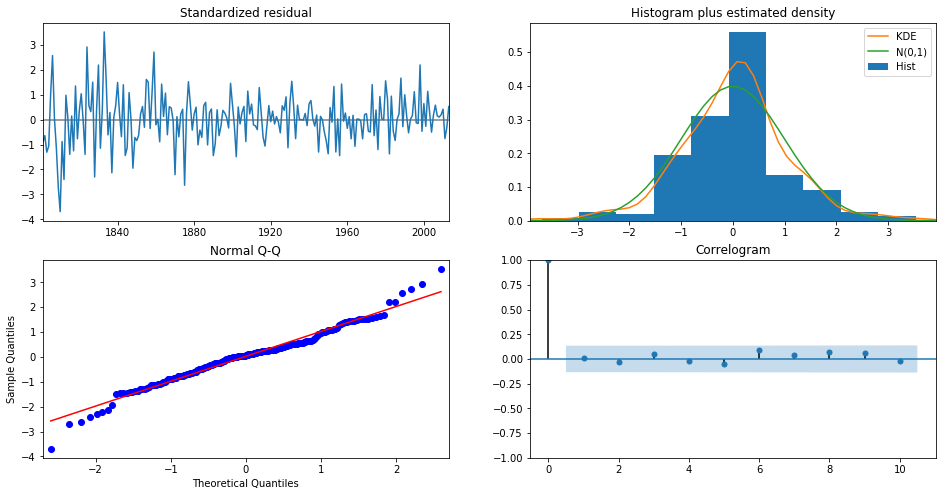

In [287]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

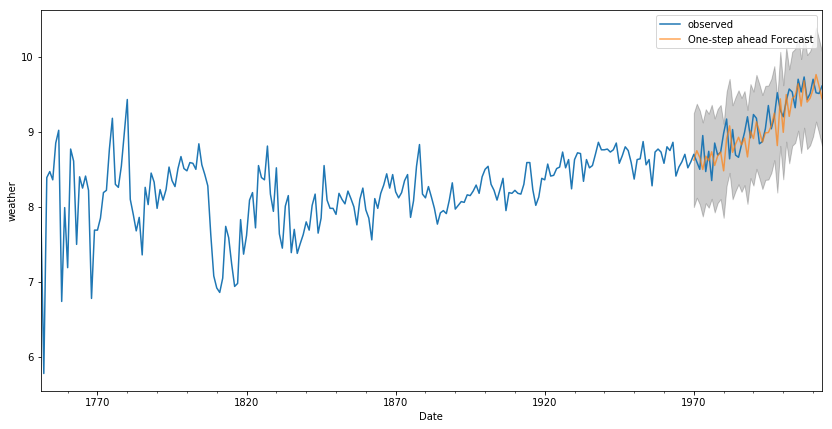

In [288]:
pred = results.get_prediction(start=pd.to_datetime('1970-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = global_s['1750-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('weather')
plt.legend()
plt.show()

In [289]:
y_forecasted = pred.predicted_mean
y_truth = global_s['1970-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.06


In [290]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.25


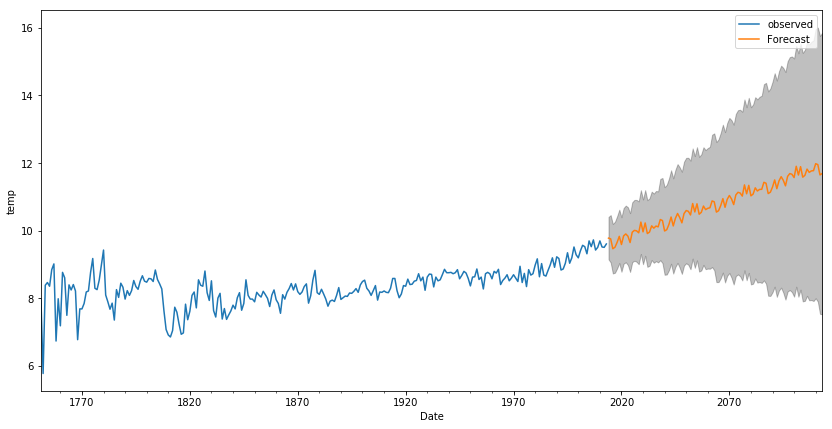

In [291]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = global_s.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('temp')
plt.legend()
plt.show()